In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the Uploaded file
df=pd.read_csv('/content/Euro History.csv')
df


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,27-09-2024,1.618,1.9558,6.0668,1.5036,0.942,7.823,NaN,25.158,7.457,...,4.9764,NaN,11.273,1.4305,NaN,NaN,36.135,38.1336,1.1158,19.1092
1,26-09-2024,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,NaN,25.159,7.4572,...,4.9759,NaN,11.3,1.4328,NaN,NaN,36.215,38.1022,1.1155,19.238
2,25-09-2024,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,NaN,25.123,7.4575,...,4.9760,NaN,11.311,1.4378,NaN,NaN,36.599,38.2090,1.1194,19.1932
3,24-09-2024,1.6237,1.9558,6.137,1.5033,0.9439,7.829,NaN,25.155,7.4571,...,4.9756,NaN,11.2935,1.4341,NaN,NaN,36.569,38.0064,1.1133,19.2869
4,23-09-2024,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,NaN,25.098,7.4581,...,4.9742,NaN,11.362,1.4357,NaN,NaN,36.654,37.9745,1.1119,19.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,08-01-1999,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.165,1.9537,188.84,42.56,42.559,0.3718,1.1659,6.7855
6651,07-01-1999,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.18,1.9436,188.8,42.765,42.1678,0.3701,1.1632,6.8283
6652,06-01-1999,1.882,NaN,NaN,1.7711,1.6116,NaN,0.582,34.85,7.4452,...,1.3168,27.4315,9.305,1.9699,188.7,42.778,42.6949,0.3722,1.1743,6.7307
6653,05-01-1999,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.5823,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.775,42.848,42.5048,0.3728,1.179,6.7975


In [ ]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6655 non-null   object 
 1   [Australian dollar ]      6655 non-null   object 
 2   [Bulgarian lev ]          6253 non-null   object 
 3   [Brazilian real ]         6387 non-null   object 
 4   [Canadian dollar ]        6655 non-null   object 
 5   [Swiss franc ]            6655 non-null   object 
 6   [Chinese yuan renminbi ]  6387 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6655 non-null   object 
 9   [Danish krone ]           6655 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6655 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6655 non-null   object 
 14  [Croatia

In [ ]:
#Checking for Duplicates
df.duplicated().sum()

0

In [ ]:
#Checking for Null values
df.isnull().sum()

,0
Period\Unit:,0
[Australian dollar ],0
[Bulgarian lev ],402
[Brazilian real ],268
[Canadian dollar ],0
[Swiss franc ],0
[Chinese yuan renminbi ],268
[Cypriot pound ],4309
[Czech koruna ],0
[Danish krone ],0


In [ ]:
#Mention the columns having null values
df.columns[df.isnull().any()]

Index(['[Bulgarian lev ]', '[Brazilian real ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Estonian kroon ]', '[Greek drachma ]',
       '[Croatian kuna ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Slovenian tolar ]', '[Slovak koruna ]', '[Turkish lira ]'],
      dtype='object')

In [ ]:
#Filling null values in rows
df= df.fillna(method='ffill')

In [ ]:
#Mention the columns having null values
df.columns[df.isnull().any()]

Index(['[Cypriot pound ]', '[Estonian kroon ]', '[Greek drachma ]',
       '[Croatian kuna ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Russian rouble ]', '[Slovenian tolar ]',
       '[Slovak koruna ]'],
      dtype='object')

In [ ]:
#removing the columns with null values for better performance
df=df.drop(['[Cypriot pound ]', '[Estonian kroon ]', '[Greek drachma ]',
       '[Croatian kuna ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Russian rouble ]', '[Slovenian tolar ]',
       '[Slovak koruna ]'],axis=1)

In [ ]:
#Checking for Null values again
df.isnull().sum()

,0
Period\Unit:,0
[Australian dollar ],0
[Bulgarian lev ],0
[Brazilian real ],0
[Canadian dollar ],0
[Swiss franc ],0
[Chinese yuan renminbi ],0
[Czech koruna ],0
[Danish krone ],0
[UK pound sterling ],0


In [ ]:
from google.colab import files

# Save the edited DataFrame to a CSV file
edited_file_name = 'df_updated.csv'
df.to_csv(edited_file_name, index=False)  # Replace `df` with your DataFrame variable

# Download the file
files.download(edited_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Updated data set
df2=pd.read_csv('/content/df_updated.csv')
df2

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Czech koruna ],[Danish krone ],[UK pound sterling ],...,[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Swedish krona ],[Singapore dollar ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,27-09-2024,1.618,1.9558,6.0668,1.5036,0.942,7.823,25.158,7.457,0.83338,...,1.7649,62.591,4.2738,4.9764,11.273,1.4305,36.135,38.1336,1.1158,19.1092
1,26-09-2024,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,25.159,7.4572,0.83428,...,1.7691,62.423,4.271,4.9759,11.3,1.4328,36.215,38.1022,1.1155,19.238
2,25-09-2024,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,25.123,7.4575,0.83653,...,1.7725,62.609,4.2643,4.9760,11.311,1.4378,36.599,38.2090,1.1194,19.1932
3,24-09-2024,1.6237,1.9558,6.137,1.5033,0.9439,7.829,25.155,7.4571,0.8322,...,1.7707,62.601,4.2665,4.9756,11.2935,1.4341,36.569,38.0064,1.1133,19.2869
4,23-09-2024,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,25.098,7.4581,0.83518,...,1.777,62.3,4.275,4.9742,11.362,1.4357,36.654,37.9745,1.1119,19.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,08-01-1999,1.8406,1.9469,1.8718,1.7643,1.6138,8.5054,34.938,7.4433,0.7094,...,2.1557,44.295,4.0363,1.3143,9.165,1.9537,42.559,0.3718,1.1659,6.7855
6651,07-01-1999,1.8474,1.9469,1.8718,1.7602,1.6165,8.5054,34.886,7.4431,0.70585,...,2.1531,44.436,4.0165,1.3092,9.18,1.9436,42.1678,0.3701,1.1632,6.8283
6652,06-01-1999,1.882,1.9469,1.8718,1.7711,1.6116,8.5054,34.85,7.4452,0.7076,...,2.189,44.872,4.0065,1.3168,9.305,1.9699,42.6949,0.3722,1.1743,6.7307
6653,05-01-1999,1.8944,1.9469,1.8718,1.7965,1.6123,8.5054,34.917,7.4495,0.7122,...,2.2011,44.745,4.0245,1.3168,9.4025,1.9655,42.5048,0.3728,1.179,6.7975


In [ ]:
# Load the uploaded dataset
file_path = '/content/df_updated.csv'
data = pd.read_csv(file_path)
# Convert the first column to datetime, assuming it's a date
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0], errors='coerce')

# Set the first column as the index if it's a date
data.set_index(data.columns[0], inplace=True)

# Convert all other columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Check for missing or non-numeric values
print(data.isnull().sum())

# Drop rows with missing values, if any
data.dropna(inplace=True)

# Confirm the structure
print(data.head())
print(data.info())

[Australian dollar ]        62
[Bulgarian lev ]            58
[Brazilian real ]           61
[Canadian dollar ]          62
[Swiss franc ]              62
[Chinese yuan renminbi ]    61
[Czech koruna ]             62
[Danish krone ]             62
[UK pound sterling ]        62
[Hong Kong dollar ]         62
[Hungarian forint ]         62
[Indonesian rupiah ]        62
[Israeli shekel ]           62
[Indian rupee ]             61
[Iceland krona ]             0
[Japanese yen ]             62
[Korean won ]               62
[Mexican peso ]             62
[Malaysian ringgit ]        62
[Norwegian krone ]          62
[New Zealand dollar ]       62
[Philippine peso ]          62
[Polish zloty ]             62
[Romanian leu ]              0
[Swedish krona ]            62
[Singapore dollar ]         62
[Thai baht ]                62
[Turkish lira ]              0
[US dollar ]                62
[South African rand ]       62
dtype: int64
              [Australian dollar ]  [Bulgarian lev ]  [Br

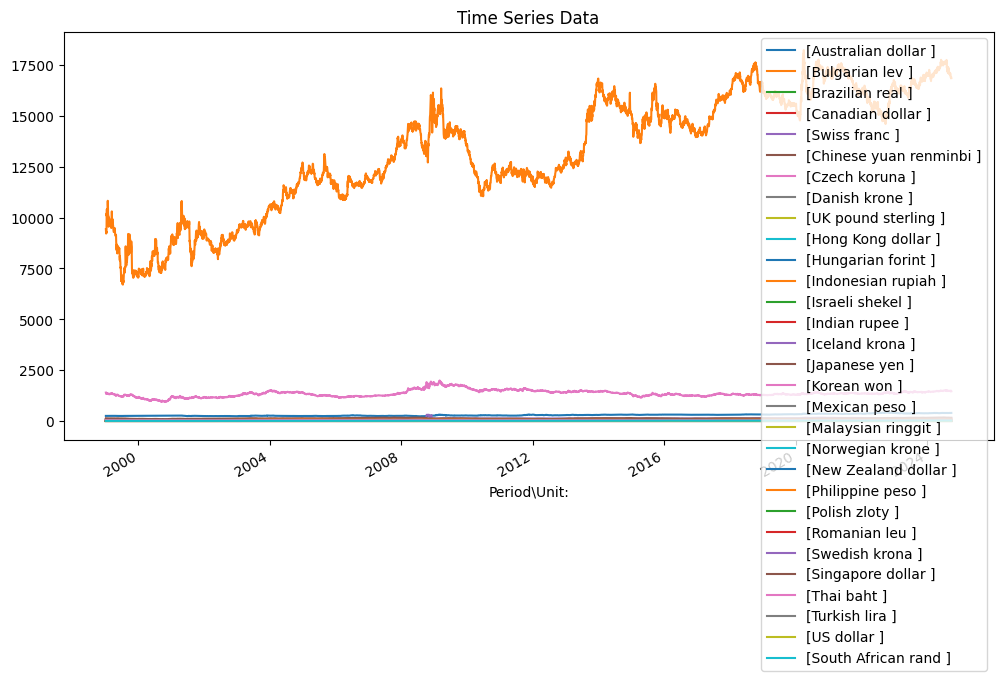

In [ ]:
# Ensure the index is a datetime index
data.index = pd.to_datetime(data.index)
# Plot the time series
data.plot(figsize=(12, 6), title="Time Series Data")
plt.show()

In [ ]:

import os
# Create the directory if it doesn't exist
os.makedirs('/mnt/data', exist_ok=True)

# Split data: 80% for training, 20% for testing
split_index = int(0.8 * len(data))
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Save the train and test datasets to CSV files
train_file_path = 'train_data.csv'
test_file_path = 'test_data.csv'

train_data.to_csv(train_file_path, index=True)
test_data.to_csv(test_file_path, index=True)

train_file_path, test_file_path


('train_data.csv', 'test_data.csv')

In [ ]:
train_data

,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Czech koruna ],[Danish krone ],[UK pound sterling ],[Hong Kong dollar ],...,[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Swedish krona ],[Singapore dollar ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
Period\Unit:,,,,,,,,,,,,,,,,,,,,,
2024-09-27,1.6180,1.9558,6.0668,1.5036,0.9420,7.8230,25.158,7.4570,0.83338,8.6737,...,1.7649,62.591,4.2738,4.9764,11.2730,1.4305,36.1350,38.1336,1.1158,19.1092
2024-09-26,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,25.159,7.4572,0.83428,8.6773,...,1.7691,62.423,4.2710,4.9759,11.3000,1.4328,36.2150,38.1022,1.1155,19.2380
2024-09-25,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,25.123,7.4575,0.83653,8.7160,...,1.7725,62.609,4.2643,4.9760,11.3110,1.4378,36.5990,38.2090,1.1194,19.1932
2024-09-24,1.6237,1.9558,6.1370,1.5033,0.9439,7.8290,25.155,7.4571,0.83220,8.6668,...,1.7707,62.601,4.2665,4.9756,11.2935,1.4341,36.5690,38.0064,1.1133,19.2869
2024-09-23,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,25.098,7.4581,0.83518,8.6576,...,1.7770,62.300,4.2750,4.9742,11.3620,1.4357,36.6540,37.9745,1.1119,19.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-03-05,1.6250,1.9469,3.5123,1.6276,1.5778,10.0913,33.115,7.4519,0.67040,9.4920,...,1.8223,68.670,4.8436,3.9881,9.2000,2.0909,48.0510,1.6151,1.2192,8.3147
2004-03-04,1.6178,1.9473,3.5057,1.6290,1.5793,10.0541,33.035,7.4522,0.66630,9.4661,...,1.8125,68.354,4.8126,3.9899,9.2151,2.0844,48.0245,1.6136,1.2147,8.3100
2004-03-03,1.6192,1.9478,3.5619,1.6443,1.5807,10.0508,32.921,7.4519,0.66330,9.4614,...,1.8152,68.294,4.8441,3.9775,9.2550,2.0780,48.0516,1.6197,1.2143,8.3909


In [ ]:
test_data

,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Czech koruna ],[Danish krone ],[UK pound sterling ],[Hong Kong dollar ],...,[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Swedish krona ],[Singapore dollar ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
Period\Unit:,,,,,,,,,,,,,,,,,,,,,
2004-02-27,1.6159,1.9484,3.6295,1.6758,1.5780,10.2784,32.435,7.4519,0.67000,9.6649,...,1.8164,69.925,4.8721,3.9932,9.2315,2.1110,48.7975,1.6440,1.2418,8.2685
2004-02-26,1.6173,1.9469,3.7060,1.6668,1.5740,10.2999,32.428,7.4517,0.66830,9.6855,...,1.8085,70.094,4.8697,4.0095,9.2191,2.1192,48.9318,1.6590,1.2444,8.2878
2004-02-25,1.6207,1.9472,3.7385,1.6809,1.5740,10.4530,32.505,7.4515,0.66820,9.8244,...,1.8232,70.953,4.8625,4.0279,9.2337,2.1361,49.5077,1.6715,1.2629,8.3317
2004-02-24,1.6259,1.9470,3.7299,1.6820,1.5745,10.4249,32.635,7.4511,0.67120,9.7963,...,1.8345,70.881,4.8833,4.0315,9.1983,2.1348,49.4483,1.6703,1.2595,8.3927
2004-02-23,1.6272,1.9503,3.7225,1.6845,1.5786,10.4092,32.605,7.4513,0.67550,9.7792,...,1.8372,70.744,4.8854,4.0468,9.1975,2.1303,49.3463,1.6700,1.2576,8.4006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-01-08,1.8406,1.9469,1.8718,1.7643,1.6138,8.5054,34.938,7.4433,0.70940,9.0302,...,2.1557,44.295,4.0363,1.3143,9.1650,1.9537,42.5590,0.3718,1.1659,6.7855
1999-01-07,1.8474,1.9469,1.8718,1.7602,1.6165,8.5054,34.886,7.4431,0.70585,9.0131,...,2.1531,44.436,4.0165,1.3092,9.1800,1.9436,42.1678,0.3701,1.1632,6.8283
1999-01-06,1.8820,1.9469,1.8718,1.7711,1.6116,8.5054,34.850,7.4452,0.70760,9.1010,...,2.1890,44.872,4.0065,1.3168,9.3050,1.9699,42.6949,0.3722,1.1743,6.7307


In [ ]:
# Load dataset
train_file_path = 'path_to_train_data.csv'  # Replace with your file path
test_file_path = 'path_to_test_data.csv'   # Replace with your file path

train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')

# Assuming the dataset has 'Date' and 'Value' columns, preprocess the data
train_data['Period\\Unit:'] = pd.to_datetime(train_data['Period\\Unit:'])
train_data.set_index('Period\\Unit:', inplace=True)  # Set 'Period\\Unit' as index

# Replace or remove non-numeric values in '[Indian rupee ]' column
train_data['[Indian rupee ]'] = pd.to_numeric(train_data['[Indian rupee ]'], errors='coerce').fillna(method='ffill')
# Convert to numeric, replace errors with NaN, then forward fill NaNs


In [ ]:
# Step 1: Check Stationarity
def check_stationarity(series):
    # Drop NaNs before performing the ADF test
    series = series.dropna()

    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The data is stationary.")
        return True
    else:
        print("The data is not stationary.")
        return False

is_stationary = check_stationarity(train_data['[Indian rupee ]'])

ADF Statistic: -1.5260248458632995
p-value: 0.5206001980628685
The data is not stationary.


In [ ]:
# If not stationary, apply differencing
if not is_stationary:
    train_data['[Indian rupee ]_diff'] = train_data['[Indian rupee ]'].diff().dropna()
    print("Applying first-order differencing...")
    is_stationary = check_stationarity(train_data['[Indian rupee ]_diff'])

# Select the series for further analysis
analyzed_series = '[Indian rupee ]_diff' if '[Indian rupee ]_diff' in train_data else '[Indian rupee ]'

Applying first-order differencing...
ADF Statistic: -23.552898320804477
p-value: 0.0
The data is stationary.


<Figure size 1200x600 with 0 Axes>

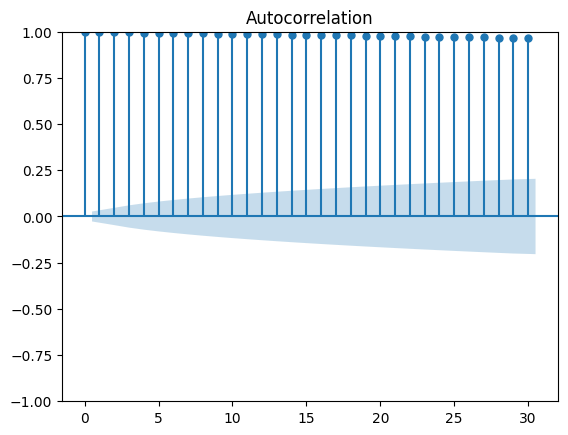

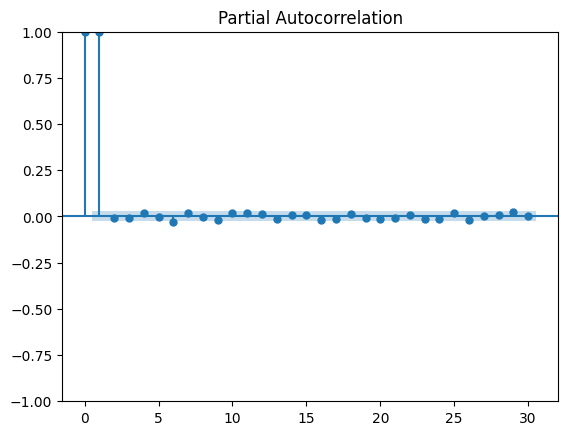

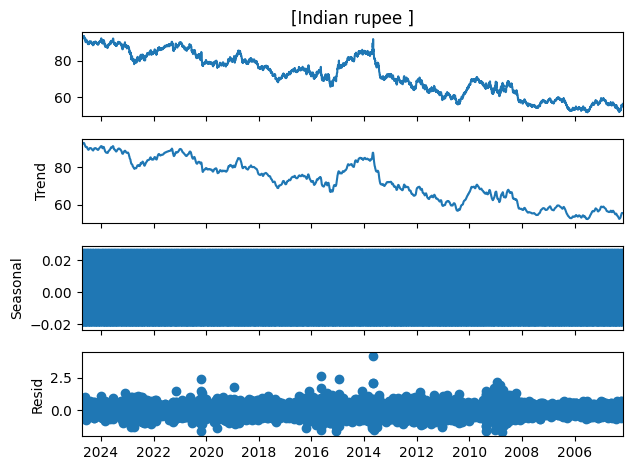

In [ ]:
# Step 2: ACF, PACF, Decomposition
# ACF and PACF Plots
plt.figure(figsize=(12, 6))
plot_acf(train_data['[Indian rupee ]'], lags=30)
plot_pacf(train_data['[Indian rupee ]'], lags=30)
plt.show()

# Decomposition
decomposition = seasonal_decompose(train_data['[Indian rupee ]'], model='additive', period=12)
decomposition.plot()
plt.show()

# **STATISTICAL MODELS**

In [ ]:
# Step 3: Predictive Models
#1. Naive Forecast
naive_forecast = train_data['[Indian rupee ]'].iloc[-1]
test_data['Naive'] = naive_forecast

In [ ]:
#2. Exponential Smoothing
model_es = ExponentialSmoothing(train_data['[Indian rupee ]'], trend='add', seasonal='add', seasonal_periods=12).fit()
test_data['Exp_Smooth'] = model_es.forecast(len(test_data))


In [ ]:
#3. ARIMA Model
model_arima = ARIMA(train_data['[Indian rupee ]'], order=(1, 1, 1)).fit()
test_data['ARIMA'] = model_arima.forecast(steps=len(test_data))

In [ ]:
#4. SARIMA Model
model_sarima = SARIMAX(train_data['[Indian rupee ]'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
test_data['SARIMA'] = model_sarima.forecast(steps=len(test_data))

In [ ]:
#5. Moving Average Model
test_data['MA'] = train_data['[Indian rupee ]'].rolling(window=5).mean().iloc[-1]

In [ ]:
# Step 4: Evaluate Models
def evaluate_models(test, columns):
    evaluation = {}
    for col in columns:
        # Convert columns to numeric, replace errors with NaN, then drop NaNs before calculating MAPE
        y_true = pd.to_numeric(test['[Indian rupee ]'], errors='coerce').dropna()
        y_pred= pd.to_numeric(test[col], errors='coerce').dropna()

        # Ensure both arrays have the same length after removing NaNs
        min_len = min(len(y_true), len(y_pred))
        y_true = y_true[:min_len]
        y_pred = y_pred[:min_len]

        # Calculate MAPE only if there are valid data points
        if len(y_true) > 0 and len(y_pred) > 0:
            evaluation[col] = mape(y_true, y_pred)#mean_absolute_percentage_error
        else:
            evaluation[col] = np.nan  # Assign NaN if no valid data points
    return evaluation


evaluation_results = evaluate_models(test_data, ['Naive', 'Exp_Smooth', 'ARIMA', 'SARIMA', 'MA'])
print("Evaluation Results (MAPE):", evaluation_results)

Evaluation Results (MAPE): {'Naive': 0.24556857314502206, 'Exp_Smooth': nan, 'ARIMA': nan, 'SARIMA': nan, 'MA': 0.22745077080964063}


**FORECASTING BASED ON STATISTICAL MODELS-USING SARIMA**

In [ ]:
# Step 5: Forecasting
forecast_sarima = model_sarima.get_forecast(steps=1)
forecast_df = forecast_sarima.conf_int(alpha=0.05)
forecast_df['forecast'] = forecast_sarima.predicted_mean

print("Forecasted Values for 29 Jan 2025:")
print(forecast_df)

# Save Forecast and Plots
forecast_df.to_csv('forecast_results.csv')
test_data.to_csv('test_data_with_predictions.csv')

Forecasted Values for 29 Jan 2025:
      lower [Indian rupee ]  upper [Indian rupee ]   forecast
5273              55.599076              57.212821  56.405949


In [ ]:
Actual_Value = 91.43
Accuracy_sarima = (forecast_df['forecast'] / Actual_Value * 100).map(lambda x: f"{x:.2f}%")

# Filter out values corresponding to 5273
filtered_accuracy = forecast_df['forecast'].apply(lambda x: None if x == 5273 else f"{x / Actual_Value * 100:.2f}%")

print('Accuracy_Sarima:', filtered_accuracy.dropna().tolist())


Accuracy_Sarima: ['61.69%']


# **DEEP LEARNING**

**DEEP LEARNING MODEL:Time-Series Transformer(TST)**

In [ ]:
#Applying Time-Series Transformer model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

# Load and preprocess the data
data = pd.read_csv('/content/df_updated.csv')
data.rename(columns={"Period\\Unit:": "Date"}, inplace=True)
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

# Convert all object columns (except Date) to numeric, coercing errors
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.fillna(method='ffill', inplace=True)

# Define target and features
target_column = "[Indian rupee ]"
features_columns = data.columns.difference(["Date", target_column])

# Prepare time-series dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, target_column, input_length, output_length):
        self.data = data
        self.target_column = target_column
        self.input_length = input_length
        self.output_length = output_length

    def __len__(self):
        return len(self.data) - self.input_length - self.output_length + 1

    def __getitem__(self, idx):
        x = self.data.iloc[idx : idx + self.input_length][features_columns].values
        y = self.data.iloc[idx + self.input_length : idx + self.input_length + self.output_length][self.target_column].values
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Hyperparameters
input_length = 30  # Number of past days to use for prediction
output_length = 7  # Predict the next 7 days
batch_size = 32

# Split data into training and testing
data_size = len(data)
train_size = int(data_size * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

train_dataset = TimeSeriesDataset(train_data, target_column, input_length, output_length)
test_dataset = TimeSeriesDataset(test_data, target_column, input_length, output_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Transformer model
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.input_dim = input_dim
        self.model_dim = model_dim

        self.embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)

# Model initialization
input_dim = len(features_columns)
model_dim = 64
num_heads = 4
num_layers = 2
output_dim = output_length

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TimeSeriesTransformer(input_dim, model_dim, num_heads, num_layers, output_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            predictions.append(outputs.cpu().numpy())
            actuals.append(y_batch.cpu().numpy())

    return np.concatenate(predictions), np.concatenate(actuals)

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=10)

# Evaluate the model
predictions, actuals = evaluate_model(model, test_loader)




Epoch 1/10, Loss: 4198.6034
Epoch 2/10, Loss: 1934.1523
Epoch 3/10, Loss: 507.7795
Epoch 4/10, Loss: 161.8403
Epoch 5/10, Loss: 131.2895
Epoch 6/10, Loss: 85.4641
Epoch 7/10, Loss: 41.2189
Epoch 8/10, Loss: 34.2613
Epoch 9/10, Loss: 32.1813
Epoch 10/10, Loss: 28.5319


**FORECASTING DL MODEL USING TIME-SERIES TRANSFORMERS(TST)**

In [ ]:
# Forecast for 29th January 2025
forecast_date = pd.Timestamp("2025-01-29")
latest_features = data.iloc[-input_length:][features_columns].values
latest_features = torch.tensor(latest_features, dtype=torch.float32).unsqueeze(0).to(device)

forecast = model(latest_features).cpu().detach().numpy()
print(f"Forecasted Indian Rupee values for the next 7 days starting from {forecast_date}: {forecast}")

Forecasted Indian Rupee values for the next 7 days starting from 2025-01-29 00:00:00: [[71.71529  71.67999  71.545425 71.57586  71.61269  71.69211  71.924484]]


In [ ]:
# To find Accuracy of result predicted
Actual_Value = 91.43
Predicted_Value = 71.71
Accuracy = Predicted_Value / Actual_Value * 100

# Format the accuracy as a percentage string
Accuracy_TST = f"{Accuracy:.2f}%"

print('Accuracy_TST:',Accuracy_TST)

Accuracy_TST: 78.43%


# **MACHINE LEARNING**

**K-NEAREST NEIGHBOUR(K-NN)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Load and preprocess the data
data = pd.read_csv('/content/df_updated.csv')
data.rename(columns={"Period\\Unit:": "Date"}, inplace=True)
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

# Convert all object columns (except Date) to numeric, coercing errors
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.fillna(method='ffill', inplace=True)

# Define target and features
target_column = "[Indian rupee ]"
features_columns = data.columns.difference(["Date", target_column])

# Prepare features and target
X = data[features_columns]
y = data[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Define and train the K-Nearest Neighbors model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred1 = knn_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print(f"RMSE: {rmse}")

RMSE: 8.012570807824003


**FORECASTING USING K-NN**



In [ ]:
# Forecast for 29th January 2025
forecast_date = pd.Timestamp("2025-01-29")
latest_features = X.iloc[-1:].values  # Use the latest row of features
forecast = knn_model.predict(latest_features)
print(f"Forecasted Indian Rupee value for {forecast_date}: {forecast[0]}")

Forecasted Indian Rupee value for 2025-01-29 00:00:00: 52.27450516545329


In [ ]:
# Actual value for accuracy calculation
Actual_Value = 91.43

# Forecasted value from K-NN
forecast_date = pd.Timestamp("2025-01-29")
latest_features = X.iloc[-1:].values  # Use the latest row of features
forecast = knn_model.predict(latest_features)

# Accuracy calculation
Accuracy_KNN = forecast[0] / Actual_Value * 100

# Display forecast and accuracy
print(f"Forecasted Indian Rupee value for {forecast_date}: {forecast[0]}")
print(f"Accuracy_KNN: {Accuracy_KNN:.2f}%")

Forecasted Indian Rupee value for 2025-01-29 00:00:00: 52.27450516545329
Accuracy_KNN: 57.17%


**SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR


# Define and train the Support Vector Machine (SVM) model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = svm_model.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f"RMSE: {rmse2}")

RMSE: 4.767317403429475


**FORECASTING USING SVM**

In [ ]:
# Forecast for 29th January 2025
forecast_date = pd.Timestamp("2025-01-29")
latest_features = X.iloc[-1:].values  # Use the latest row of features
forecast1= svm_model.predict(latest_features)
print(f"Forecasted Indian Rupee value for {forecast_date}: {forecast1[0]}")


Forecasted Indian Rupee value for 2025-01-29 00:00:00: 50.12785549512179


In [ ]:
# Actual value for accuracy calculation
Actual_Value = 91.43

# Accuracy calculation
Accuracy_SVM = forecast1[0] / Actual_Value * 100

# Display forecast and accuracy
print(f"Forecasted Indian Rupee value for {forecast_date}: {forecast1[0]}")
print(f"Accuracy_SVM: {Accuracy_SVM:.2f}%")

Forecasted Indian Rupee value for 2025-01-29 00:00:00: 50.12785549512179
Accuracy_SVM: 54.83%


**GRADIENT BOSSTING - ENSEMBLE METHOD**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Define and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred3 = gb_model.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print(f"RMSE: {rmse3}")

RMSE: 7.128436304449211


In [ ]:
# Forecast for 29th January 2025
forecast_date = pd.Timestamp("2025-01-29")
latest_features = X.iloc[-1:].values  # Use the latest row of features
forecast2 = gb_model.predict(latest_features)
print(f"Forecasted Indian Rupee value for {forecast_date}: {forecast2[0]}")


Forecasted Indian Rupee value for 2025-01-29 00:00:00: 51.41530327347414


In [ ]:
# Actual value for accuracy calculation
Actual_Value = 91.43

# Accuracy calculation
Accuracy_gb = forecast2[0] / Actual_Value * 100

# Display forecast and accuracy
print(f"Forecasted Indian Rupee value for {forecast_date}: {forecast2[0]}")
print(f"Accuracy_gb: {Accuracy_gb:.2f}%")

Forecasted Indian Rupee value for 2025-01-29 00:00:00: 51.41530327347414
Accuracy_gb: 56.23%


# TRENDING MODEL FOR TIME SERIES ANALYSIS

**PROPHET(Traditional Statistics + Modern Machine Learning)**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdecrcx43/of1yn2cw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdecrcx43/0ebhtuwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94171', 'data', 'file=/tmp/tmpdecrcx43/of1yn2cw.json', 'init=/tmp/tmpdecrcx43/0ebhtuwe.json', 'output', 'file=/tmp/tmpdecrcx43/prophet_modele523bzz_/prophet_model-20250128185038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:50:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:50:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasted Indian Rupee value for 2025-01-28 00:00:00: 91.4335027127613


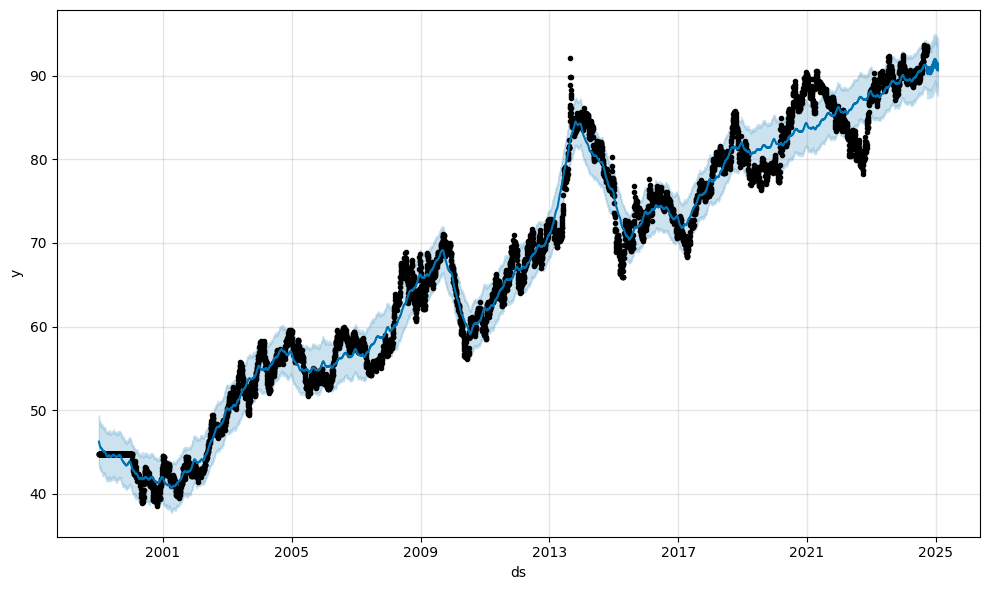

In [ ]:
import pandas as pd
from prophet import Prophet

# Load and preprocess the data
data = pd.read_csv('/content/df_updated.csv')
data.rename(columns={"Period\\Unit:": "Date"}, inplace=True)
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

# Prepare data for Prophet
data = data.rename(columns={"Date": "ds", "[Indian rupee ]": "y"})
data["y"] = pd.to_numeric(data["y"], errors='coerce')  # Convert to numeric, coercing errors
data = data.dropna()  # Drop rows with missing values

# Define and fit the Prophet model
model = Prophet()
model.fit(data)

# Forecast for dates including 28-01-2025
future_dates = model.make_future_dataframe(periods=(pd.Timestamp("2025-01-28") - data["ds"].max()).days)
forecast_prop = model.predict(future_dates)

# Extract the forecasted value for 28-01-2025
forecast_date = pd.Timestamp("2025-01-28")
forecast_value = forecast_prop[forecast_prop['ds'] == forecast_date]['yhat'].values
if len(forecast_value) > 0:
    print(f"Forecasted Indian Rupee value for {forecast_date}: {forecast_value[0]}")
else:
    print(f"No forecast available for {forecast_date}.")

# Plot the forecast
model.plot(forecast_prop).show()


In [ ]:
# Actual value for accuracy calculation
Actual_Value = 90.45
forecast_prop = 91.43
# Calculating accuracy
Accuracy_Prophet = (1 - abs(Actual_Value - forecast_prop) / Actual_Value) * 100
print('Accuracy_Prophet: {:.2f}%'.format(Accuracy_Prophet))

Accuracy_Prophet: 98.92%
